# Evaluation of the Results of the Experiment on Influence of Drought Events

The previous experiment (amplitude of precipitation variation vs. possible income from trade) has shown, that variation in precipitation (that also changes the (time) average precipitation) notable differences in the short and long run development of the System occur.

Following up, this experiments evaluates the influence of one time drought events on the systen state and its recovery after the drought event has ended.

In [45]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X6_drought_parameter_scan/results/trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X6_drought_parameter_scan/results/trajectory'
    
data = pd.read_pickle(location)
#data = np.load(location)

def plot_figure(ax, d, r, k, obs, d_start):
    ax.set_title('{}) d_length = {}, r_trade = {}'.format(k, d, r))
    dt = data['<mean_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity')
    de = data['<sigma_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity')
    dt.plot(ax=ax)
    for d_sev in de.columns.values:
        dtt = de.index.values
        ddt = dt[d_sev].values
        dde = de[d_sev].values
        plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

    ax.set_ylabel(obs)
    ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')

data.head()

Populating the interactive namespace from numpy and matplotlib


key                                                                        <mean_trajectories>  \
d_length d_severity r_trade timesteps observables                                                
5        0.0        6000    0         MAP                                          1716.330910   
                                      built trade links                               0.000000   
                                      es_income_agricultural_productivity             0.000000   
                                      es_income_forest                             7069.775482   
                                      es_income_pop_density                           0.000000   

key                                                                        <sigma_trajectories>  
d_length d_severity r_trade timesteps observables                                                
5        0.0        6000    0         MAP                                              0.000000  
                                      built trade links                                0.000000  
                                      es_income_agricultural_productivity              0.000000  
                                      es_income_forest                               351.521244  
                                      es_income_pop_density                            0.000000

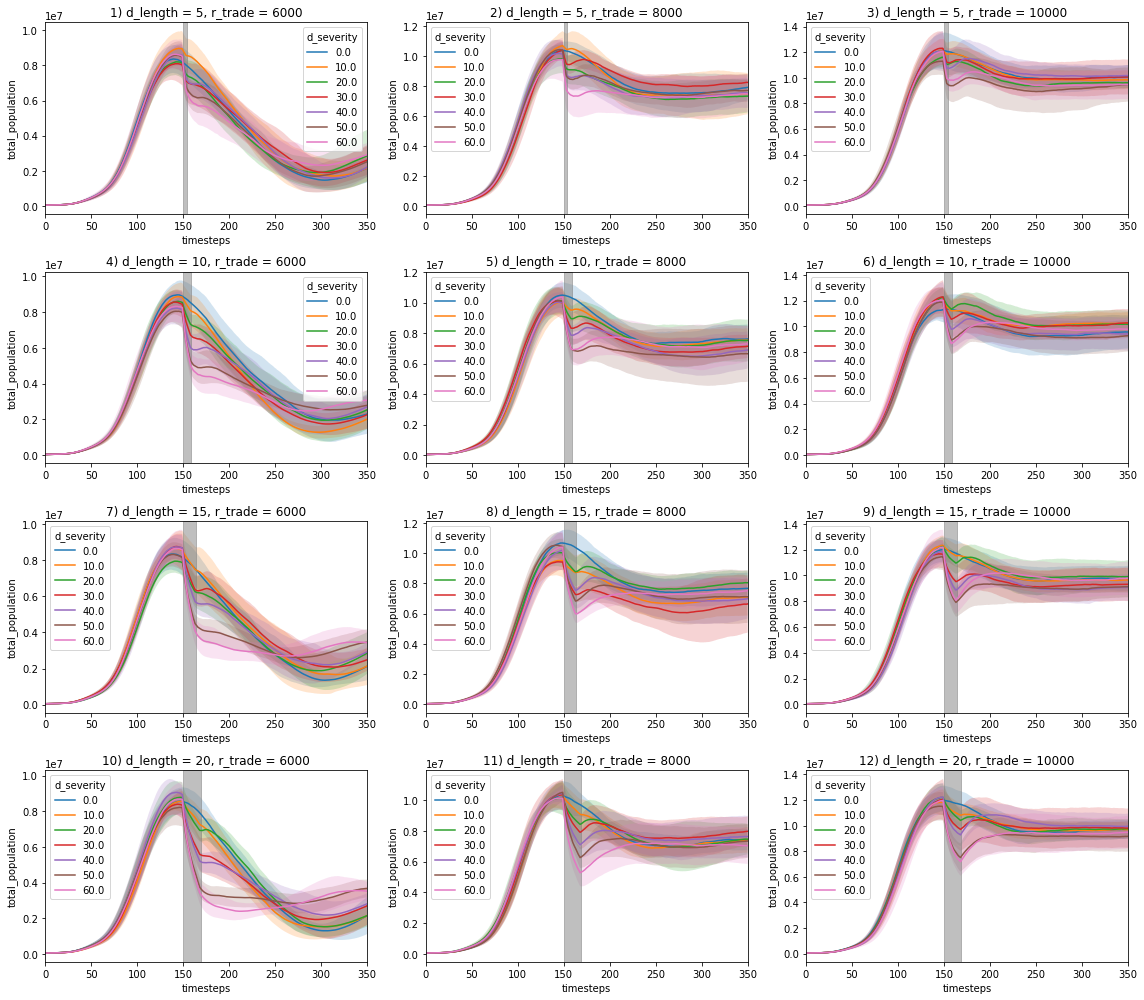

In [46]:
pylab.rcParams['figure.figsize'] = (16, 14)

d_lengths = data.index.levels[0].values
r_trades = data.index.levels[2].values

fig = plt.figure()
k = 0
plots = []
for i, d in enumerate(d_lengths):
    for j, r in enumerate(r_trades):
        k += 1
        ax = fig.add_subplot(len(d_lengths), len(r_trades), j + 1 + i * len(r_trades))
        obs = 'total_population'
        plot_figure(ax, d, r, k, obs, d_start)
        plots.append((d, r, k, obs, d_start))
fig.tight_layout()

On a first glance, the results show a great deal of variance. (lines are the mean over 10 runs, colored area is the corresponding 1 $\sigma$ range).

Below, a closer look at the middle plot from the bottom row:

(20, 8000, 11, 'total_population', 150)


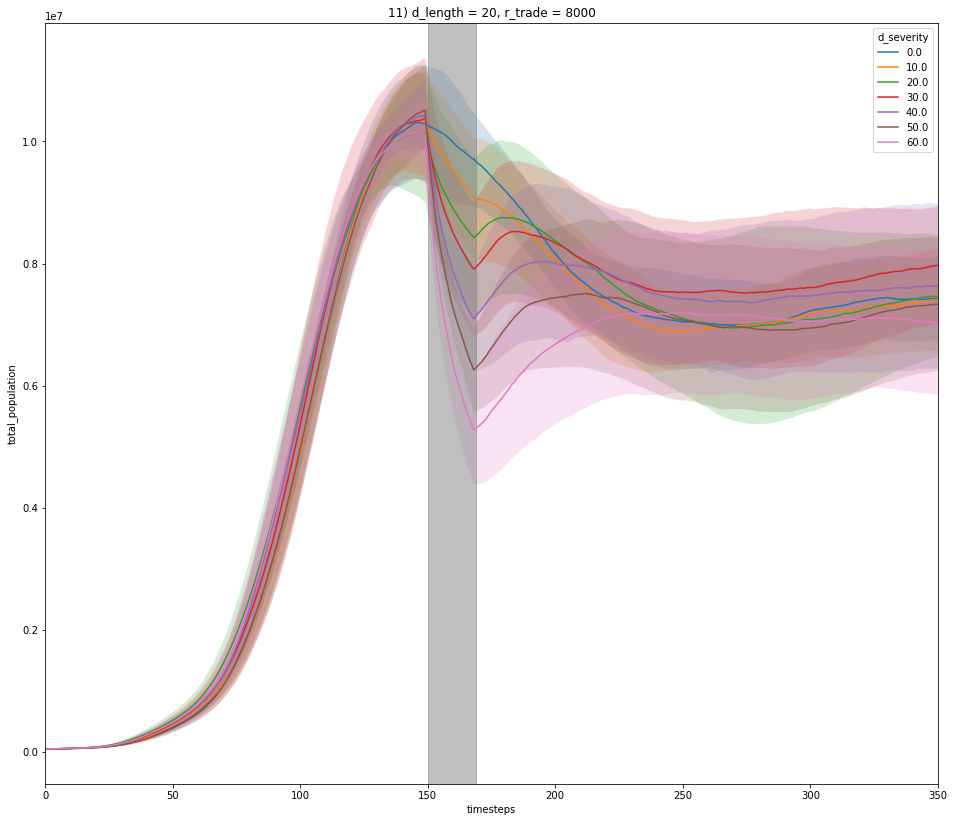

In [47]:
fig, ax = plt.subplots()
print(plots[10])
plot_figure(ax, *plots[10])

This first glance at the development of the total population depending on possible income from trade and the length and severity of droughts shows that one drought does not 'tip' the systen. It rather leads to a sudden drop in population with subsequent recovery. Generally, the trajectories of runs with drought events do even better than those without after recovery.

Question: 
* **what causes this strong and persistent recovery?**
* **would subsequent drought events change this behavior?**
* **does the timing of drought events matter?**

Below, I show the aggregated trade income of the society. Apparently, for r_trade >= 8000, e.g. big possible income from trade, the decrease in rain fall does not impair the income from trade. Probably, because income from trade is big enough to sustain city sizes responsible for exactly this income - e.g. the society does not really need precipitation anymore (especially vor r_trade = 10000). This could serve as one possible explanation for the small influence of drought events on societies with r_trade >= 8000.

Therefore, the range of 6000 < r_trade < 9000 seems most interesting for my agenda.

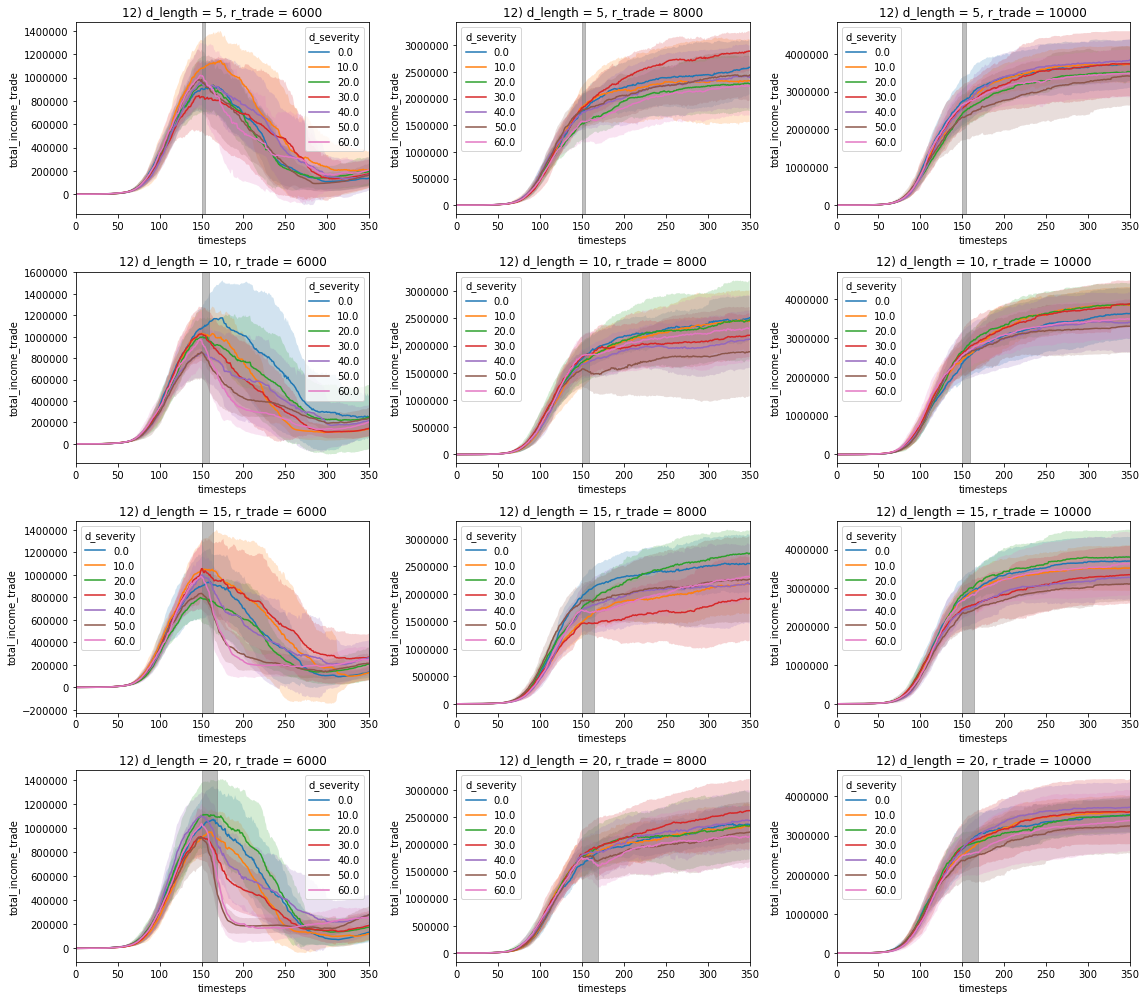

In [49]:
pylab.rcParams['figure.figsize'] = (16, 14)

d_lengths = data.index.levels[0].values
r_trades = data.index.levels[2].values

fig = plt.figure()
for i, d in enumerate(d_lengths):
    for j, r in enumerate(r_trades):
        ax = fig.add_subplot(len(d_lengths), len(r_trades), j + 1 + i * len(r_trades))
        obs = 'total_income_trade'
        plot_figure(ax, d, r, k, obs, d_start)
fig.tight_layout()